In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_1 = pd.read_csv('customers.csv')
df_2 = pd.read_csv('geolocation.csv')
df_4 = pd.read_csv('order_items.csv')
df_5 = pd.read_csv('orders.csv')
df_6 = pd.read_csv('payments.csv')
df_7 = pd.read_csv('products.csv')
df_8 = pd.read_csv('sellers.csv')

In [5]:
df_5["order_purchase_timestamp"]= pd.to_datetime(df_5["order_purchase_timestamp"])
orders = df_5[df_5["order_purchase_timestamp"].dt.year.isin([2016,2017,2018])]
orders["year_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

In [6]:
monthly_orders=orders.groupby("year_month").size().reset_index()
monthly_orders


,year_month,0
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [8]:
most_payment_type = df_6.groupby("payment_type").size().reset_index(name="Total_payment")
most_payment_type

,payment_type,Total_payment
0,UPI,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


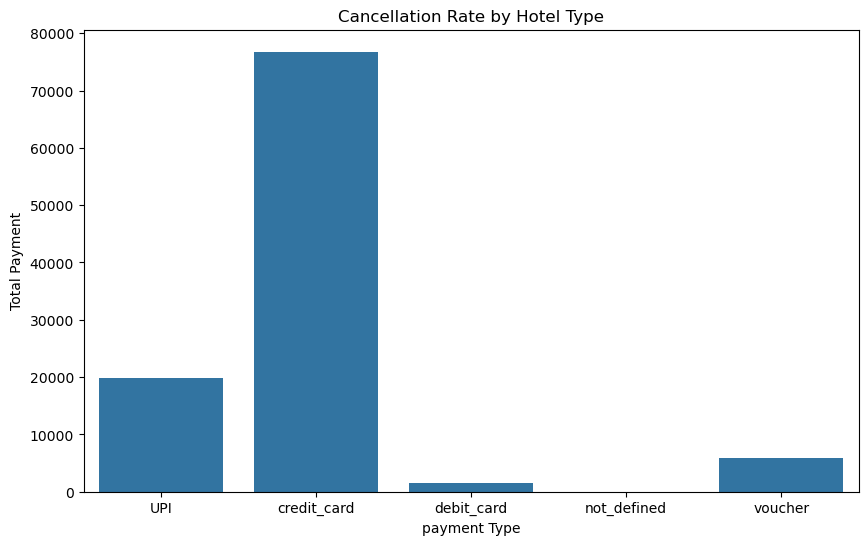

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='Total_payment', data=most_payment_type, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('payment Type')
plt.ylabel('Total Payment')
plt.show()